### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### About the Dataset

  - age
  - sex
      * 0: Female
      * 1: Male
  - chest pain type (4 values)
      * value 0: typical angina 
      * value 1: atypical angina 
      * value 2: non-anginal pain
      * value 3: asymptomatic
   - trestbps : resting blood pressure (in mm Hg on admission to the   
                hospital)
   - chol : serum cholestoral in mg/dl
   - fbs : (fasting blood sugar > 120 mg/dl)(1 = true; 0 = false)
   - restecg : resting electrocardiographic results 
      * value 0: normal
      * value 1: having ST-T wave abnormally (T wave inversions and/or ST   
                  elevation or depression of > 0.05 mV)
      * value 2: showing probable or definite left ventricular hypertrophy 
                  by Estes' criteria 
   - thalach : maximum heart rate achieved
   - exang : exercise induced angina (1=yes;0=no)
   - oldpeak = ST depression induced by exercise relative to rest 
   - Slope : the slope of the peak exercise ST segment 
      * value 1: upsloping 
      * value 2: flat
      * value 3: downsloping
   - ca : number of major vessels (0-3) colored by flourosopy
   - thal : 3 = normal; 6=fixed detect; 7 = reversable defect
   - target : 0 = less chance of heart attack, 1 = more chance of heart 
                attack
   

To check the shape of the model

In [4]:
df.shape

(1025, 14)

To Know about the information of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(302, 14)

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Gender Distribution

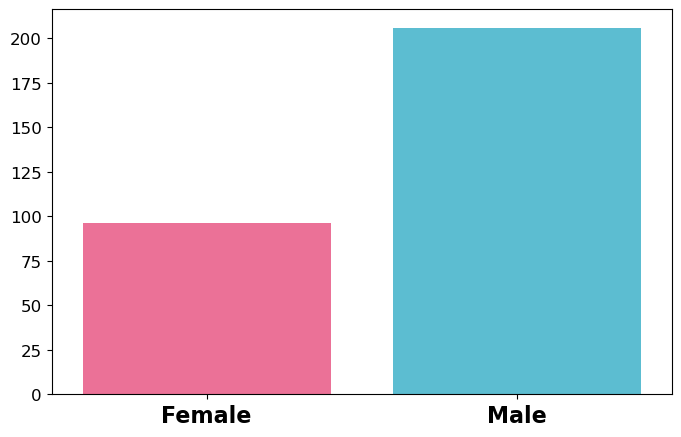

In [10]:
plt.figure(figsize=[8,5])
colors = ['#ff5d8f','#48cae4'] 
sns.countplot(x=df['sex'],palette=colors)
plt.xticks([0,1],["Female","Male"],fontsize=16,fontweight='bold')
plt.xlabel("")
plt.ylabel("")
plt.yticks(fontsize=12)
plt.show()

### Gender Distribution by Disease Status

In [11]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

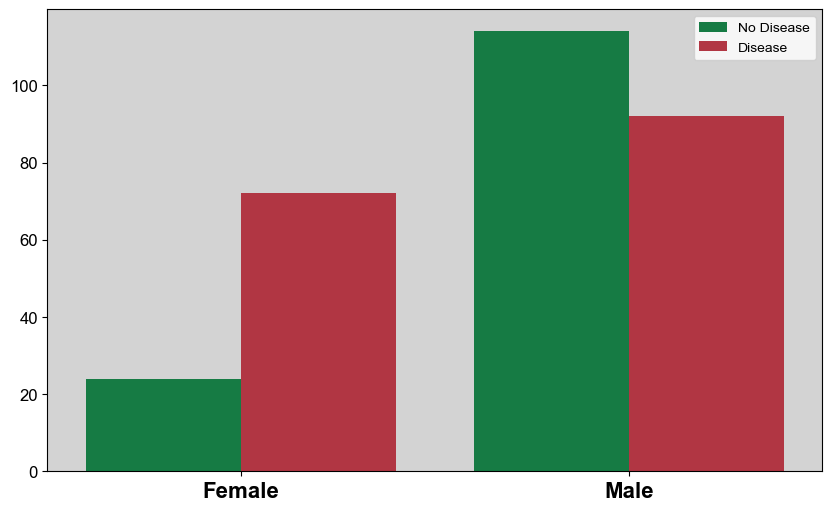

In [12]:
custom_palette = {
     0 : '#058c42',
     1 : '#c52233'
}
plt.figure(figsize=[10,6])
ax = sns.countplot(df,x='sex',hue='target',palette=custom_palette)
plt.xticks([0,1],['Female','Male'],fontsize=16,fontweight='bold')
plt.xlabel("")
plt.ylabel("")
plt.yticks(fontsize=12)
plt.legend(labels=["No Disease","Disease"])
sns.set_style('darkgrid')
ax.set_facecolor('lightgrey') 
plt.show()

### Age Distribution

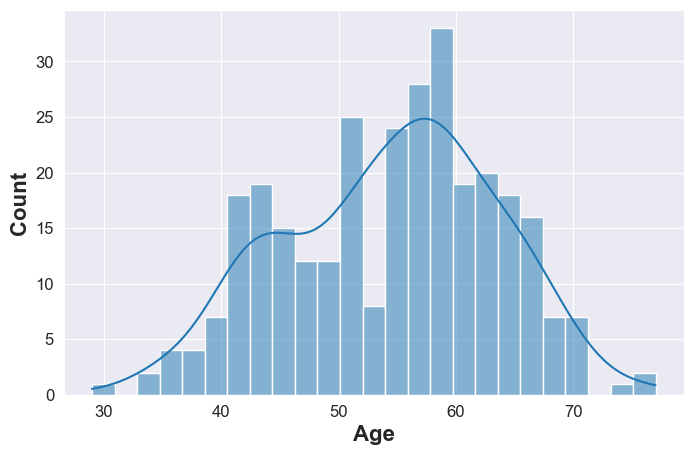

In [26]:
plt.figure(figsize=[8,5])
sns.histplot(df['age'],bins=25,kde=True)
plt.xticks(fontsize=12)
plt.xlabel("Age",fontsize=16,fontweight='bold')
plt.ylabel("Count",fontsize=16,fontweight='bold')
plt.yticks(fontsize=12)
plt.show()

### Chest Pain Distribution by Disease Status

<b> There are four types of chest pains </b> <br>
     0 - Typical Angina <br>
     1 - Atypical Angina <br>
     2 - Non-anginal pain <br>
     3 - Asymptomatic <br>

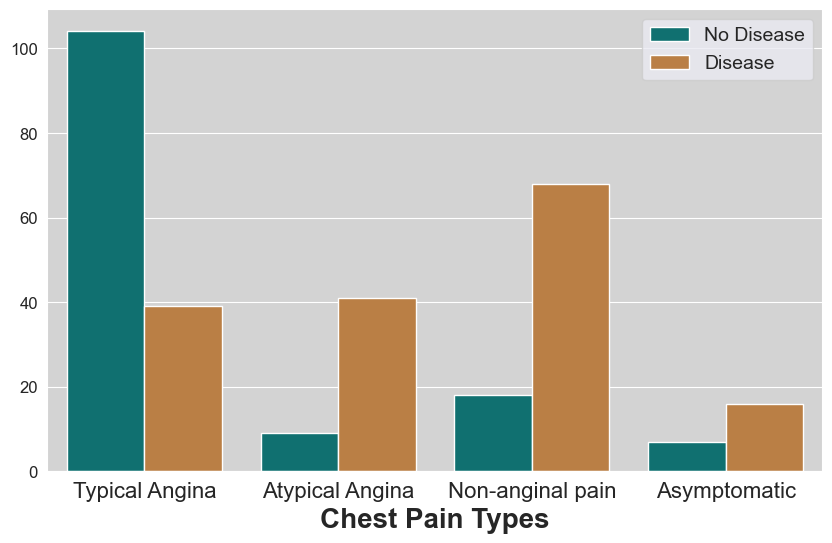

In [14]:
colors = ['#008080','#CD7F32']
plt.figure(figsize=[10,6])
ax = sns.countplot(x=df['cp'],hue=df['target'],palette=colors)
plt.xlabel("Chest Pain Types",fontsize=20,fontweight='bold')
plt.xticks([0,1,2,3],['Typical Angina','Atypical Angina','Non-anginal pain','Asymptomatic'],fontsize=16)
plt.ylabel("")
plt.yticks(fontsize=12)
plt.legend(["No Disease","Disease"],fontsize=14)
sns.set_style('darkgrid')
ax.set_facecolor('lightgrey')
plt.show()

### Selecting Features and Target variables

In [15]:
X = df.drop(['target'],axis=1)
Y = df['target']

### Hyperparameter Tuning

In [27]:
model_params = {
    
    'Logistic_regression' : {
         'model' : LogisticRegression(),
         'parameters' : {
             'fit_intercept' : [True,False]
        }
    },
    
    'Random_forest' : {
         'model' : RandomForestClassifier(),
         'parameters' : {
             'n_estimators' : [25,50,75,100],
             'criterion' : ['gini','entropy','log_loss'],
         }
    },
    
    'Decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'parameters' : {
            'criterion': ['gini','entropy'],
        }
    
    },
    
    'KNN' : {
        'model' : KNeighborsClassifier(),
        'parameters' : {
            'n_neighbors' : [2,3,4,5,6,7]
        }
    },
    
    'SVM' : {
        'model' : SVC(),
        'parameters' : {
            'C' : [1,5,10]
        }
    }
   
    
}

In [28]:
scores = [] 

for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['parameters'],cv=5,return_train_score=False)
    clf.fit(X,Y)
    scores.append({
        'model_name' : model_name,
        'best_parameters' : clf.best_params_,
        'best_score' : clf.best_score_
    })
    
df1 = pd.DataFrame(scores,columns=['model_name','best_parameters','best_score'])  

In [29]:
df1 = df1.sort_values(by='best_score',ascending=False) 
df1

,model_name,best_parameters,best_score
1,Random_forest,"{'criterion': 'log_loss', 'n_estimators': 100}",0.841038
0,Logistic_regression,{'fit_intercept': True},0.837760
2,Decision_tree,{'criterion': 'gini'},0.774863
4,SVM,{'C': 10},0.685519
3,KNN,{'n_neighbors': 5},0.655956


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify=Y,test_size=0.2,shuffle=True,random_state=1)

In [36]:
model = RandomForestClassifier(n_estimators=25)

In [37]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=25)

In [38]:
predict = model.predict(X_test)
predict

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

 To find accuracy score for the model

In [39]:
accuracy = accuracy_score(Y_test,predict)*100
print("The accuracy score is :",accuracy)

The accuracy score is : 85.24590163934425


## Building a Predictive System

In [47]:
random = np.random.randint(1,302)
input_data = df.iloc[random,:-1]
input_data = np.asarray(input_data)
input_data = input_data.reshape(1,-1)
prediction = model.predict(input_data)

if(prediction[0]==1):
    print("The person has Heart disease")
else :
    print("The person does not have Heart disease")

The row number is 233
The person has Heart disease
